In [0]:
import pandas as pd
import numpy as np
import chess
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import utils
import xgboost as xgb
import sklearn.metrics

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data = pd.read_csv('/content/gdrive/My Drive/cse519_project/game_type.csv')
data = data.drop(columns=["Unnamed: 0"])
data = pd.DataFrame(data).fillna(0)

In [0]:
pip install matplotlib==3.1.0

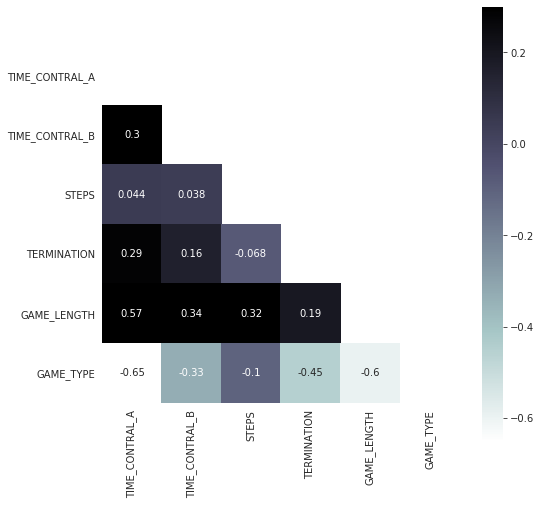

In [0]:
plt.figure(figsize=(8,8))
corr_matrix = data.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  p2 = sns.heatmap(corr_matrix, mask=mask, vmax=0.3, square=True, cmap="bone_r",annot=True)

In [0]:
data['GAME_LENGTH']

0        166.0
1        293.0
2        326.0
3        206.0
4        599.0
         ...  
23465     15.0
23466     15.0
23467    135.0
23468    174.0
23469     49.0
Name: GAME_LENGTH, Length: 23470, dtype: float64

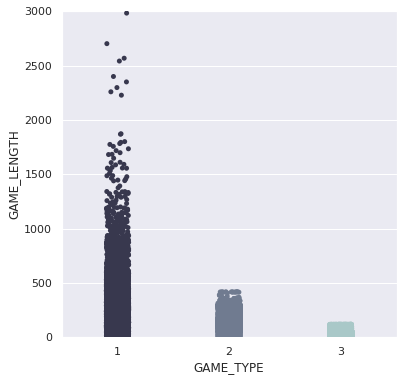

In [0]:
sns.set()
plt.figure(figsize=(6,6))
sns.stripplot(y=data["GAME_LENGTH"], x=data["GAME_TYPE"],palette='bone')
plt.ylim((0,3000))
plt.show()

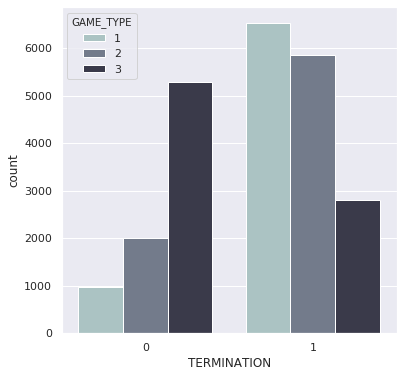

In [0]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x="TERMINATION", hue="GAME_TYPE",data=data, palette='bone_r')
plt.show()

(0, 2000)

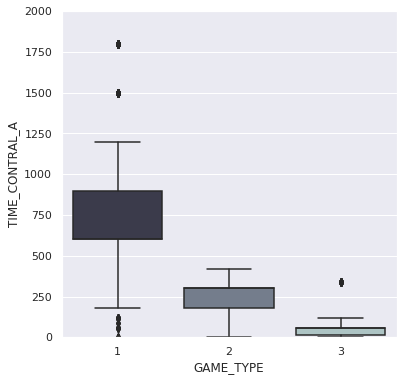

In [0]:
sns.set()
plt.figure(figsize=(6,6))
sns.boxplot(x=data['GAME_TYPE'], y=data['TIME_CONTRAL_A'],palette="bone")
plt.ylim((0,2000))

(0, 20)

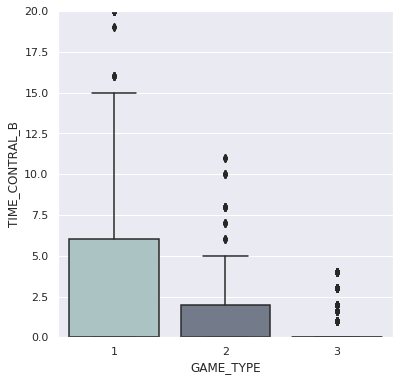

In [0]:
sns.set()
plt.figure(figsize=(6,6))
sns.boxplot(x=data['GAME_TYPE'], y=data['TIME_CONTRAL_B'],palette="bone_r")
plt.ylim((0,20))

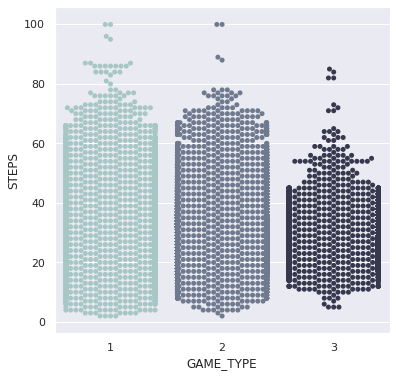

In [0]:
sns.set()
plt.figure(figsize=(6,6))
sns.swarmplot(x=data['GAME_TYPE'], y=data['STEPS'],palette="bone_r")

In [5]:
features, target = data.ix[:,:5], data.ix[:,5]
train_data, test_data, train_target, test_target = train_test_split(features, target, test_size=0.2,random_state=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


In [6]:
model = LinearRegression()
model.fit(train_data, train_target)
pred = model.predict(test_data)
acc = model.score(test_data, test_target)
print('The accuracy is', acc*100,'%')

The accuracy is 54.51551313654428 %


In [10]:
print(sklearn.metrics.mean_squared_error(test_target,pred))
print(sklearn.metrics.r2_score(test_target,pred))

0.302776222940835

In [12]:
xgb_model = xgb.XGBClassifier(
    gamma=0,learning_rate=0.1,max_depth=5,
    min_child_weight=3, n_estimators=200, n_jobs=1,
    objective='binary:logistic', random_state=42,
    subsample=0.9, colsample_bytree=0.9,
)
xgb_model.fit(train_data, train_target)
pred1 = xgb_model.predict(test_data)
acc1 = xgb_model.score(test_data, test_target)
print('The accuracy is', acc1*100,'%')

The accuracy is 99.80826587132509 %


In [13]:
print(sklearn.metrics.mean_squared_error(test_target,pred1))
print(sklearn.metrics.r2_score(test_target,pred1))

0.0025564550489987218
0.9961595714166789


In [14]:
from sklearn.neighbors import KNeighborsClassifier
nn = KNeighborsClassifier()
nn.fit(train_data, train_target)
pred2 = nn.predict(test_data)
acc2 = nn.score(test_data, test_target)
print('The accuracy is', acc2*100,'%')

The accuracy is 96.9961653174265 %


In [15]:
print(sklearn.metrics.mean_squared_error(test_target,pred2))
print(sklearn.metrics.r2_score(test_target,pred2))

0.033233915636983385
0.9500744284168261


In [16]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(objective='multiclass', random_state=5)
lgbm.fit(train_data, train_target)
pred3= lgbm.predict(test_data)
acc3 = lgbm.score(test_data, test_target)
print('The accuracy is', acc3*100,'%')

The accuracy is 99.80826587132509 %


In [17]:
print(sklearn.metrics.mean_squared_error(test_target,pred3))
print(sklearn.metrics.r2_score(test_target,pred3))

0.0025564550489987218
0.9961595714166789


In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
rfc.fit(train_data, train_target)
pred4= rfc.predict(test_data)
acc4 = rfc.score(test_data, test_target)
print('The accuracy is', acc4*100,'%') 

The accuracy is 98.67916489135065 %


In [19]:
print(sklearn.metrics.mean_squared_error(test_target,pred4))
print(sklearn.metrics.r2_score(test_target,pred4))

0.015125692373242437
0.9772774642153503
